In [90]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [91]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)

throws = throw_a_coin(50)
print('throws: ',', '.join(throws))
print('number of heads:', np.sum(throws=='H'))

throws:  T, T, H, H, H, H, T, T, H, H, H, T, H, H, H, H, H, H, T, T, T, T, H, T, H, T, T, T, T, H, T, H, T, H, T, T, H, T, T, H, T, H, T, T, T, H, H, H, H, T
number of heads: 25


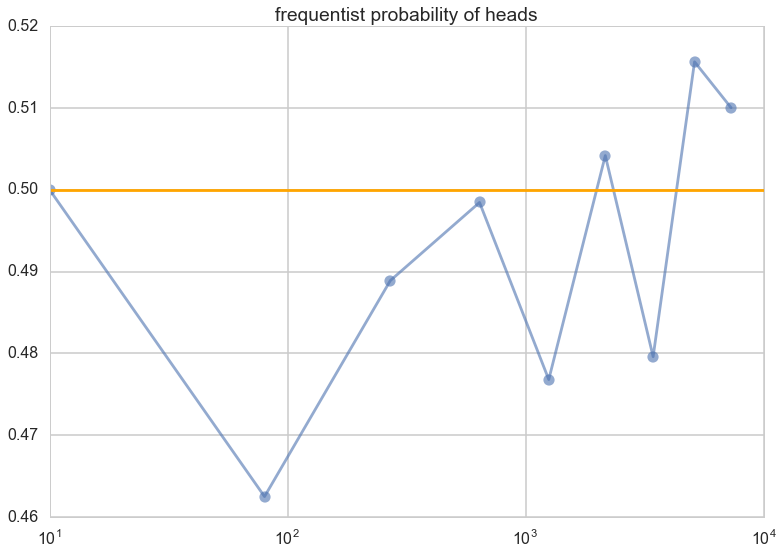

In [92]:
trials = [10*i**3 for i in range(10)]
plt.plot(trials, [np.sum(throw_a_coin(i)=='H')/i for i in trials], 'o-', alpha=0.6)
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='orange')
plt.title('frequentist probability of heads')

In [93]:
''' bring in data from 2012 presidential election '''

predictwise = pd.read_csv('Lab3_content/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [94]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1,1))*model.Votes.values.reshape(-1, 1)
    # -ive 1 means that length or "re-shaped" array will be inferred from original shape
    return obama_votes.sum(axis=0) # sum each element in each row to get list of possilbe results

result = simulate_election(predictwise, 100000)
print(result)
print((result >= 269).sum())

[338 288 347 ..., 270 287 332]
99571


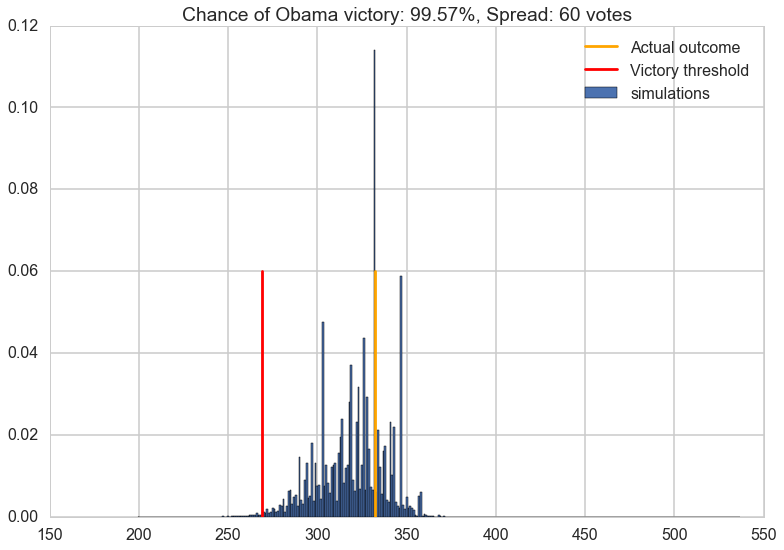

In [95]:
def plot_simulation(sim_result):
    plt.hist(sim_result, bins=range(200, 538, 1),
        label = 'simulations', align='left', normed=True)
    plt.axvline(332, 0, 0.5, color='orange', label='Actual outcome')
    plt.axvline(269, 0, 0.5, color='r', label='Victory threshold')
    
    p05 = np.percentile(sim_result, 5.0) # number of seats if he performs in bottom 5%
    p95 = np.percentile(sim_result, 95.0) # number of seats if he performs in the top 5%
    ip = int(p95 - p05)
    winp = ((sim_result >= 269).mean() *100)
    
    plt.title("Chance of Obama victory: %0.2f%%, Spread: %d votes" % (winp, ip))
    plt.legend()

plot_simulation(result)

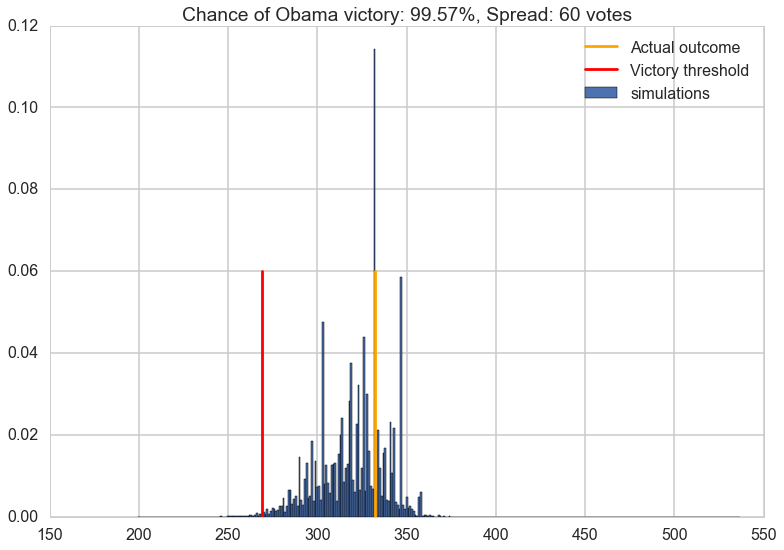

In [96]:
''' lets plot a larger "predictive distribution" '''

plot_simulation(simulate_election(predictwise, 1000000))

Now lets look at Bernoulli random variables (the Bernoulli distibution represents coin flips).  Let X be a random sample distributed according to Bernoulli(p).  The probability distribution function (PDF) also known as the probability mass function (PMF) for the Bernoulli distribution is

$$P(X=1)=p,\\ P(X=0)=1-p,$$

where p ranges from 0 to 1.  This can be generalized as

$$ P(X=x)=p^x(1-p)^{1-x} \\$$

Note that P(X=x) is the same as asking, what is the probability that our sample X will be some particular value x.  The parameter p is specific to the Bernoulli distribution and can be set to model some particular data.

In [97]:
from scipy.stats import bernoulli
# lets get some "bernoulli random variables"
brv = bernoulli(p=0.3)
brv.rvs(size=20)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

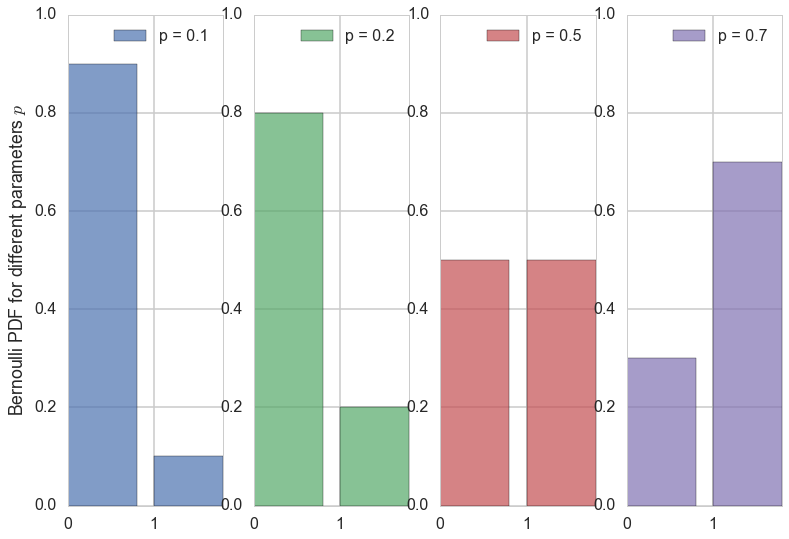

In [98]:
event_space = [0,1]
plt.figure()
colors = sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label='p = %0.1f'%p, color=colors[i], alpha=0.7)
    
    ax.xaxis.set_ticks(event_space)
    
    plt.ylim(0,1)
    plt.legend(loc='best')
    if i ==0:
        plt.ylabel('Bernoulli PDF for different parameters $p$')

Now let's talk about uniform distributions in which we could say samples are given by: X~Uniform([0,1]) with an associate PDF of

$$ P(X=x)=1 \text{ if } x \text{ in range }[0,1]\\
P(X=x)=0 \text{ otherwise}\\$$

With the election simulation, we actually sampled a Bernoulli distribution using uniform random numbers!

An empirical PMF, or probability density function (PDF) - in the case where the random samples X can take on continuous values, gives an interpretation (I guess) of random data.  The formal definition is unclear, here an example is illustrated.

We can ask "what is the probability that a random variable is less than some value" i.e. P(X<x); this is a probability distribution called the cumulative distribution function (CDF) and can be obtained by summing the probability density function (PDF) for all X less than x.

In [99]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
print(np.sum(result < 330))
print(len(result)==result.shape[0])
for votes in [200, 300, 320, 340, 360, 380, 400, 500]:
    print("Obama win CDF at votes =", votes, "is", CDF(votes))

63296
True
Obama win CDF at votes = 200 is 0.0
Obama win CDF at votes = 300 is 0.14794
Obama win CDF at votes = 320 is 0.44791
Obama win CDF at votes = 340 is 0.84266
Obama win CDF at votes = 360 is 0.99781
Obama win CDF at votes = 380 is 1.0
Obama win CDF at votes = 400 is 1.0
Obama win CDF at votes = 500 is 1.0


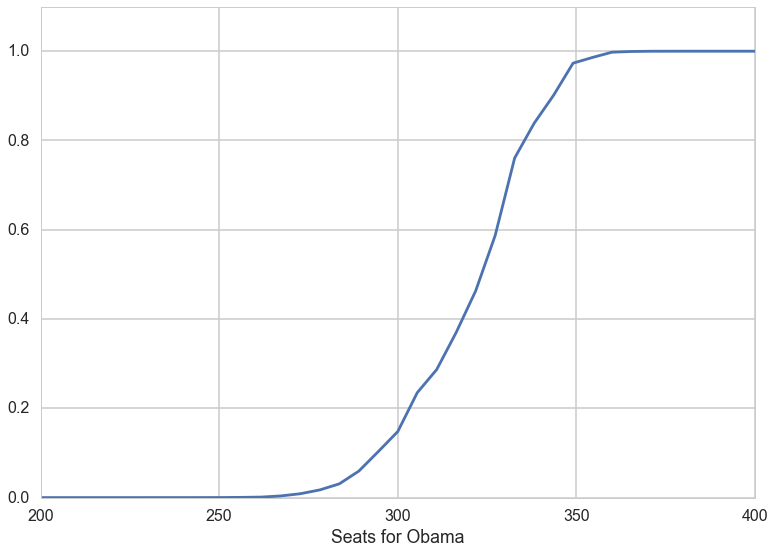

In [100]:
votelist = np.linspace(0, 540, 100)
plt.plot(votelist, [CDF(v) for v in votelist])
plt.xlim([200, 400])
plt.ylim([0,1.1])
plt.xlabel('Seats for Obama')

Finally we look at a Binomial distribution.  Each coin flip comes from a Bernoulli random variable where p=0.5.  We can ask for the probability of flipping k heads in n tries e.g., flip 5 coins and get 4 heads.  The probability of this is given by the Binomial distribution.  It's an extension of the Bernoulli distribution when n>1 (i.e. more than 1 flip):

$$ P(X=k;n,p)={n \choose k}p^k(1-p)^{n-k} \\$$

where

$$ {n \choose k}=\frac{n!}{k!(n-k)!}. \\$$

The expected value is Bar[X]=np the variance is Var[X]=np(1-p).  This is obtained as follows:

-$p^k(1-p)^{n-k}$ comes from multiplying the probabilities for each Bernoulli trial
-the ${n \choose k}$ comes from counting the number of ways in which each event could happen

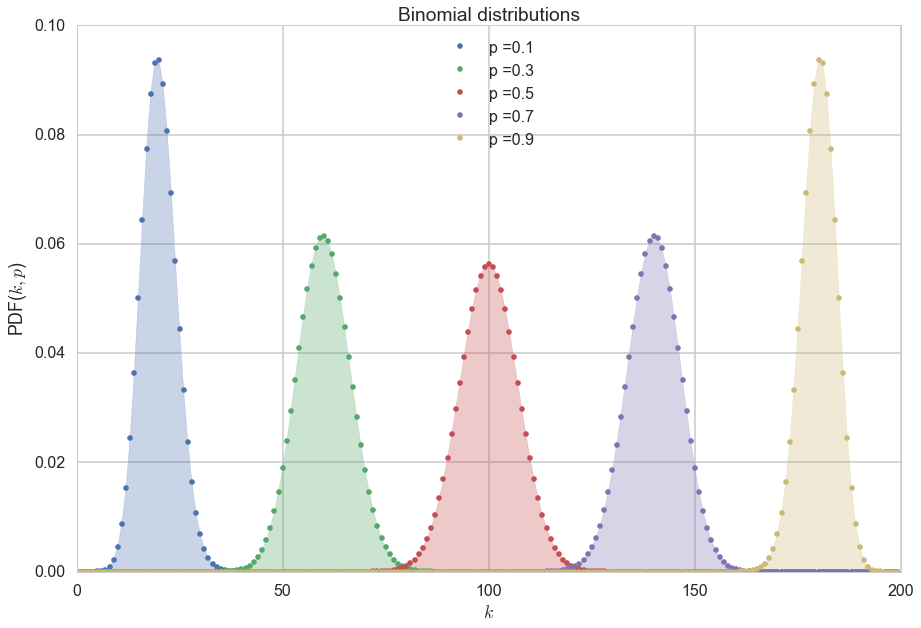

(0, 5)

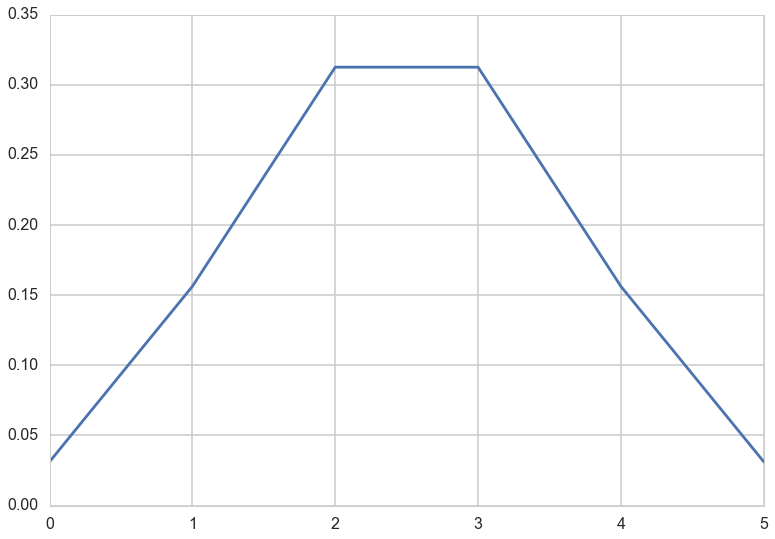

In [101]:
'''
lets plot this distribution for 200 trials
this is all good and well, but the lab did not illustrate
how we get e.g. the probability of 4 flips out of 5 being heads
'''

from scipy.stats import binom
plt.figure()
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label='p =%0.1f'%p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.3)
plt.legend(loc='upper center')
plt.title("Binomial distributions")
plt.tight_layout()
plt.ylabel('PDF($k,p$)')
plt.xlabel('$k$')
plt.show()

'''
this illustrates is a bit better:
'''

plt.figure()
k = np.arange(0,6)
rv = binom(5, 0.5)
plt.plot(k, rv.pmf(k))
plt.xlim(0,5)